# Lenstronomy Tutorials
30 October 2019

Arthur Tsang

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import lenstronomy

# Starting guide
Following tutorial at [starting_guide.ipynb](https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/starting_guide.ipynb).
## `LensModel`
Start with single-plane lensing. Note that we don't have to specify source and lens redshifts (how does this work?).

In [2]:
from lenstronomy.LensModel.lens_model import LensModel

In [3]:
# specify the choice of lens model #
lens_model_list = ['SPEP', 'SHEAR_GAMMA_PSI', 'SIS']
# SPEP means Softened power-law elliptical potential
# SHEAR_GAMMA_PSI models a shear field with shear strength and direction (psi_ext is an angle)

lensModel = LensModel(lens_model_list=lens_model_list)

# parameter values of lens models #
kwargs_spep = {'theta_E':1.1, 'e1':0.05, 'e2':0.05, 'gamma': 2., 'center_x': 0.1, 'center_y': 0}
kwargs_shear = {'gamma_ext': 0.01, 'psi_ext': -1.}
kwargs_sis = {'theta_E':0.1, 'center_x': 1., 'center_y': -0.1}
kwargs_lens = [kwargs_spep, kwargs_shear, kwargs_sis]

# image plane coordinate #
theta_ra, theta_dec = .9, .4 # units of arcsec

# source plane coordinate #
beta_ra, beta_dec = lensModel.ray_shooting(theta_ra, theta_dec, kwargs_lens) # doesn't need to know redshifts!

In [4]:
# Fermat potential #
fermat_pot = lensModel.fermat_potential(x_image=theta_ra, y_image=theta_dec,
                                        x_source=beta_ra, y_source=beta_dec,
                                        kwargs_lens=kwargs_lens)

# Magnification #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)

The `LensModel` also allows to compute the Hessian, the shear, the convergence, the deflection angle, and the lensing potential.

In [5]:
# keep the imports and variables from above #
# specify redshifts of deflectors #
redshift_list = [0.5, 0.5, .1]
# specify source redshift #
z_source = 1.5
# setup lens model class with the list of lens models #
lensModel_mp = LensModel(lens_model_list=lens_model_list,
                         z_source=z_source,
                         lens_redshift_list=redshift_list,
                         multi_plane=True)

# source plane coordinate #
beta_ra, beta_dec = lensModel_mp.ray_shooting(theta_ra, theta_dec, kwargs_lens)

# Magnification #
mag = lensModel_mp.magnification(theta_ra, theta_dec, kwargs_lens)

# arrival time relative to a straight path through (0,0) #
dt = lensModel_mp.arrival_time(theta_ra, theta_dec, kwargs_lens)

## Lens equation solver
(Does this part get slow with many image planes?)

In [6]:
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

In [7]:
# specify lens model to solve #
solver = LensEquationSolver(lensModel)

# solve for image positions #
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)

In [8]:
theta_ra, theta_dec

(array([-0.96869007, -0.27872512, -0.97045756,  0.97942697]),
 array([ 0.78152058, -1.23716183, -0.65335185,  0.16960473]))

In [9]:
# magnification of point source images #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)

In [10]:
mag

array([ 4.63611846,  6.78919878, -7.78842752, -3.08259726])

## Plotting

In [11]:
import lenstronomy.Plots.output_plots as lens_plot

/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


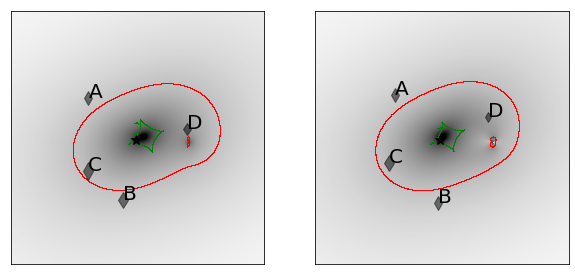

In [12]:
f, axex = plt.subplots(1,2, figsize=(10,5), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex[0], lensModel=lensModel, kwargs_lens=kwargs_lens,
                         sourcePos_x=beta_ra, sourcePos_y=beta_dec,
                         point_source=True, with_caustics=True)
lens_plot.lens_model_plot(axex[1], lensModel=lensModel_mp, kwargs_lens=kwargs_lens,
                         sourcePos_x=beta_ra, sourcePos_y=beta_dec,
                         point_source=True, with_caustics=True)
f.show()

Plot of convergence, caustics, and critical curves. The lens on the left is a single plane. The lens on the right is multi-plane.

### Arrival time surface

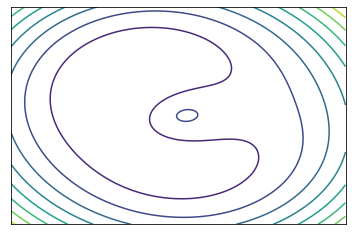

In [13]:
# arrival time surface built-in function doesn't work for multiplane :(
ax = plt.gca()
lens_plot.arrival_time_surface(ax, lensModel=lensModel, kwargs_lens=kwargs_lens)
                         #with_caustics=True)

### What else can we plot? (TODO)

## `LightModel`
So you can have light coming out of the source (and lens).

Galaxy surface brightness in terms of various analytic profiles, shapelet basis set.

I don't know how you're supposed to visualize this, but I think one of the extensions notebooks [here](https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/EinsteinRingShear_simulations.ipynb) will be useful.

In [14]:
from lenstronomy.LightModel.light_model import LightModel
# set up list of light models #
source_light_model_list = ['SERSIC']
lightModel_source = LightModel(light_model_list=source_light_model_list)
lens_light_model_list = ['SERSIC_ELLIPSE']
lightModel_lens = LightModel(light_model_list=lens_light_model_list)

# define the parameters #
kwargs_light_source = [{'amp':5000, 'R_sersic':0.02, 'n_sersic':1.5,
                        'center_x':beta_ra, 'center_y': beta_dec}]

In [15]:
import lenstronomy.Util.param_util as param_util

In [16]:
e1, e2 = param_util.phi_q2_ellipticity(phi=0.5, q=0.7)
kwargs_light_lens = [{'amp': 100000, 'R_sersic':0.1, 'n_sersic':2.5,
                     'e1':e1, 'e2':e2, 'center_x':0.1, 'center_y':0}]

# evaluate surface brightness at a specific position #
flux = lightModel_lens.surface_brightness(x=1, y=1, kwargs_list=kwargs_light_lens)

In [17]:
flux

array(14.63486565)

## `PointSource` module

`fixed_magnification_list`: list of bools (same length as `point_source_type_list`, in our case `len = 1`). If True, magnification ratio of point sources is fixed to the one given by the lens model.

Here we demonstrate how to do this from either the image or the source plane. The result is the same regardless.

In [18]:
# import the PointSource class #
from lenstronomy.PointSource.point_source import PointSource

In [19]:
# unlensed source position #
point_source_model_list = ['SOURCE_POSITION']
pointSource = PointSource(point_source_type_list=point_source_model_list,
                          lensModel=lensModel, fixed_magnification_list=[True])
kwargs_ps = [{'ra_source': beta_ra, 'dec_source': beta_dec, 'source_amp': 100}]
# return image positions and amplitudes #
x_pos, y_pos = pointSource.image_position(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)
point_amp = pointSource.image_amplitude(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)

In [20]:
print(x_pos[0])
print(y_pos[0])
print(point_amp[0])

[-0.96869007 -0.27872512 -0.97045756  0.97942697]
[ 0.78152059 -1.23716183 -0.65335185  0.16960473]
[463.61184568 678.91987775 778.84275203 308.25972628]


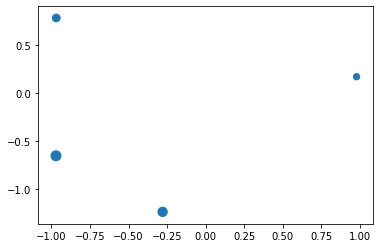

In [21]:
sizes = point_amp[0] / max(point_amp[0]) * 100
plt.scatter(x_pos[0], y_pos[0], s=sizes)

In [22]:
# lensed image positions (solution of the lens equation) #
point_source_model_list = ['LENSED_POSITION']
pointSource = PointSource(point_source_type_list=point_source_model_list, lensModel=lensModel,
                          fixed_magnification_list=[False])
kwargs_ps = [{'ra_image': theta_ra, 'dec_image': theta_dec, 'point_amp': np.abs(mag)*100}]
# return image positions and amplitudes #
x_pos, y_pos = pointSource.image_position(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)
point_amp = pointSource.image_amplitude(kwargs_ps=kwargs_ps, kwargs_lens=kwargs_lens)

In [23]:
print(x_pos[0])
print(y_pos[0])
print(point_amp[0])

[-0.96869007 -0.27872512 -0.97045756  0.97942697]
[ 0.78152058 -1.23716183 -0.65335185  0.16960473]
[463.61184587 678.91987782 778.84275202 308.2597263 ]


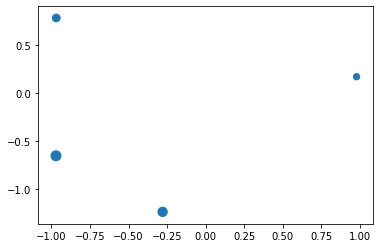

In [24]:
sizes = point_amp[0] / max(point_amp[0]) * 100
plt.scatter(x_pos[0], y_pos[0], s=sizes)

## `Data` module

`PixelGrid` class stores and manages coordinate frame and coordinate-to-pixel transformation necessary to simulate images. `PSF` class for PSF. These are all that we need in order to simulate a mock lens.

`Data` class inherits from `PixelGrid` and takes care of pixel values and noise properties (not sure what that means more concretely).

In [25]:
# import the PixelGrid() class #
from lenstronomy.Data.pixel_grid import PixelGrid
deltaPix = 0.05  # size of pixel in angular coordinates (does that mean arcsec?) #

# setup the keyword arguments to create the Data() class #
ra_at_xy_0, dec_at_xy_0 = -2.5, -2.5 # coordinate in angles (RA/DEC) at the position of the pixel edge (0,0)
transform_pix2angle = np.array([[1, 0], [0, 1]]) * deltaPix # ...
    # linear translation matrix of a shift in pixel in a shift in coordinates
    
kwargs_pixel = {'nx': 100, 'ny': 100,  # number of pixels per axis
                'ra_at_xy_0': ra_at_xy_0,  # RA at pixel (0,0)
                'dec_at_xy_0': dec_at_xy_0,  # DEC at pixel (0,0)
                'transform_pix2angle': transform_pix2angle} 
pixel_grid = PixelGrid(**kwargs_pixel)
# return the list of pixel coordinates #
x_coords, y_coords = pixel_grid.pixel_coordinates
# compute pixel value of a coordinate position #
x_pos, y_pos = pixel_grid.map_coord2pix(ra=0, dec=0)
# compute the coordinate value of a pixel position #
ra_pos, dec_pos = pixel_grid.map_pix2coord(x=20, y=10)

So you see, the `PixelGrid` doesn't actually store any pixel-value data.

In [26]:
# import the PSF() class #
from lenstronomy.Data.psf import PSF
kwargs_psf = {'psf_type': 'GAUSSIAN',  # type of PSF model (supports 'GAUSSIAN' and 'PIXEL')
              'fwhm': 0.1,  # full width at half maximum of the Gaussian PSF (in angular units)
              'pixel_size': deltaPix  # angular scale of a pixel (required for a Gaussian PSF
                                      #   to translate the FWHM into a pixel scale)
             }
psf = PSF(**kwargs_psf)
# return the pixel kernel corresponding to a point source # 
kernel = psf.kernel_point_source

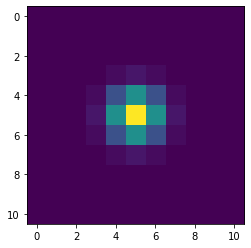

In [27]:
plt.imshow(kernel)

Makes sense. It's an old kernel, but it checks out.

## `ImSim` module

Wow, so many modules... Anyway, the core module here is `ImageModel`, which combines the different components: `LensModel`, `LightModel`, `PointSource`, and `Data` (more or less everything we've done up till now).

First we simulate an image:

In [28]:
# import the ImageModel class #
from lenstronomy.ImSim.image_model import ImageModel
# define the numerics #
kwargs_numerics = {'supersampling_factor': 1, # each pixel gets super-sampled (in each axis direction) 
                  'supersampling_convolution': False}
# initialize the Image model class by combining the modules we created above #
imageModel = ImageModel(data_class=pixel_grid, psf_class=psf, lens_model_class=lensModel,
                        source_model_class=lightModel_source,
                        lens_light_model_class=lightModel_lens,
                        point_source_class=pointSource, 
                        kwargs_numerics=kwargs_numerics)
# simulate image with the parameters we have defined above #
image = imageModel.image(kwargs_lens=kwargs_lens,
                         kwargs_source=kwargs_light_source,
                         kwargs_lens_light=kwargs_light_lens,
                         kwargs_ps=kwargs_ps)

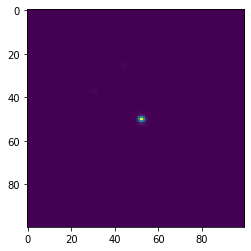

In [29]:
plt.imshow(image)

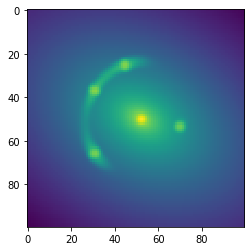

In [30]:
plt.imshow(np.log(image))

Then we add noise:

In [31]:
# we can also add noise #
import lenstronomy.Util.image_util as image_util
exp_time = 100  # exposure time to quantify the Poisson noise level (what units?)
background_rms = 0.1  # background rms value
poisson = image_util.add_poisson(image, exp_time=exp_time)
bkg = image_util.add_background(image, sigma_bkd=background_rms)
image_noisy = image + bkg + poisson

/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


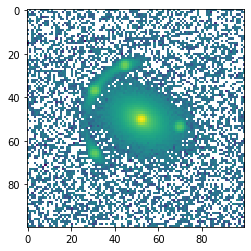

In [32]:
plt.imshow(np.log(image_noisy))

### Linear inversion

Predict flux values thanks to linear response in amplitude of surface brightness (I think we are given the pixel values and the full model except for the brightnesses).

We use `ImageLinearFit` which inherits from `ImageModel` (the class we were just using), except instead of taking in a `PixelGrid`, it takes in an `ImageData` (the data would be something like the mock image just above
).

In this example, we have 6 parameters: 4 point source amplitudes, and two Sersic amplitudes (1 lens, 1 source). `lenstronomy` automatically figures this out and (if possible) figures out what the values should be.

In [33]:
from lenstronomy.Data.imaging_data import ImageData
# update the data with the noisy image and its noise properties #
kwargs_data = {'image_data': image_noisy,
               'background_rms': background_rms,
               'exposure_time': exp_time,
               'ra_at_xy_0': ra_at_xy_0,  
               'dec_at_xy_0': dec_at_xy_0,
               'transform_pix2angle': transform_pix2angle}
data_class = ImageData(**kwargs_data)

So now this `ImageData` object knows all about the noise-parameters that went into creating the noisy data.

In [34]:
from lenstronomy.ImSim.image_linear_solve import ImageLinearFit
image_linear_fit = ImageLinearFit(data_class=data_class, psf_class=psf, lens_model_class=lensModel,
                        source_model_class=lightModel_source,
                        lens_light_model_class=lightModel_lens,
                        point_source_class=pointSource, 
                        kwargs_numerics=kwargs_numerics)

# we do not require the knowledge of the linear parameters #
del kwargs_light_source[0]['amp']
# apply the linear inversion to fit for the noisy image #
image_reconstructed, _, _, _ = image_linear_fit.image_linear_solve(
    kwargs_lens=kwargs_lens,
    kwargs_source=kwargs_light_source, 
    kwargs_lens_light=kwargs_light_lens,
    kwargs_ps=kwargs_ps)

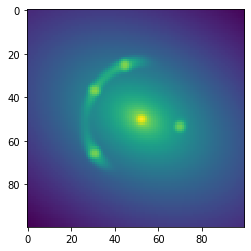

In [35]:
plt.imshow(np.log(image_reconstructed))

Well, the only thing they really did was to fiddle with brightnesses. Ok, now for the proper way how to make the image (can worry about this later):

-1.0039555187231437 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  0.952441702340182
-1.006787760784964 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  0.9542844347599315


/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/lenstronomy/Plots/output_plots.py:546: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',


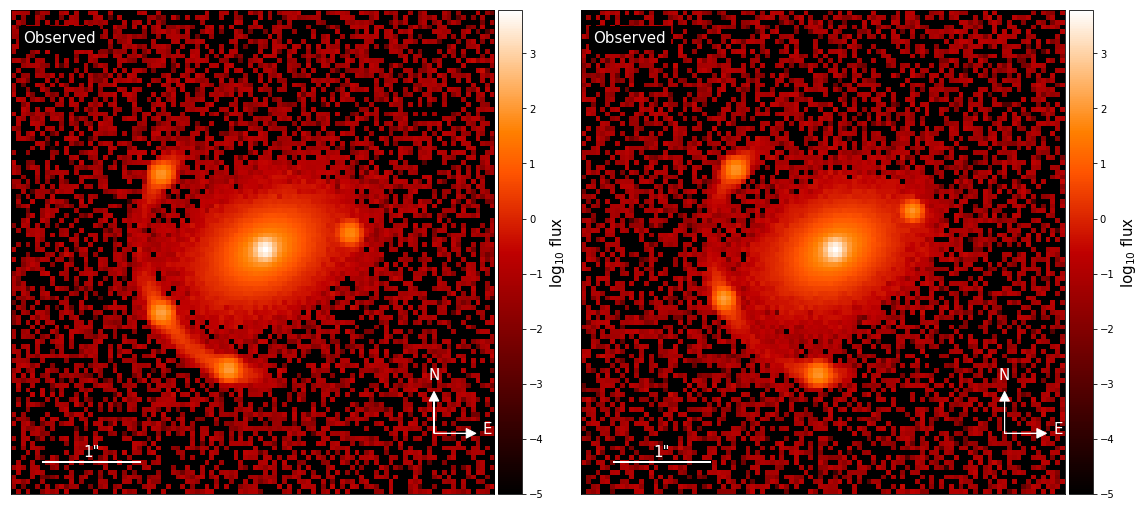

In [36]:
# illustrate fit #
from lenstronomy.Plots.output_plots import ModelPlot
kwargs_model = {'lens_model_list': lens_model_list, 'source_light_model_list': source_light_model_list,
               'lens_light_model_list': lens_light_model_list,
                'point_source_model_list': point_source_model_list}
kwargs_params = {'kwargs_lens': kwargs_lens, 'kwargs_source': kwargs_light_source,
                 'kwargs_lens_light': kwargs_light_lens, 'kwargs_ps': kwargs_ps}
lensPlot = ModelPlot([[kwargs_data, kwargs_psf, kwargs_numerics]], kwargs_model, kwargs_params, arrow_size=0.02)



kwargs_model_mp = {'lens_model_list': lens_model_list, 'z_source': z_source,
                   'lens_redshift_list': redshift_list,
                   'multi_plane': True,
                   'source_light_model_list': source_light_model_list,
               'lens_light_model_list': lens_light_model_list, 'point_source_model_list': ['SOURCE_POSITION']}
pointSource_mp = PointSource(point_source_type_list=['SOURCE_POSITION'],
                             lensModel=lensModel_mp, fixed_magnification_list=[True])
kwargs_ps_mp = [{'ra_source': beta_ra, 'dec_source': beta_dec, 'source_amp': 100}]
imageModel_mp = ImageModel(data_class=data_class, psf_class=psf, lens_model_class=lensModel_mp,
                        source_model_class=lightModel_source,
                        lens_light_model_class=lightModel_lens,
                        point_source_class=pointSource_mp, 
                        kwargs_numerics=kwargs_numerics)
# simulate image with the parameters we have defined above #
image_mp = imageModel_mp.image(kwargs_lens=kwargs_lens, kwargs_source=kwargs_light_source,
                         kwargs_lens_light=kwargs_light_lens, kwargs_ps=kwargs_ps_mp)


poisson = image_util.add_poisson(image_mp, exp_time=exp_time)
bkg = image_util.add_background(image_mp, sigma_bkd=background_rms)
image_noisy_mp = image_mp + bkg + poisson
import copy
kwargs_data_mp = copy.deepcopy(kwargs_data)
kwargs_data_mp['image_data'] = image_noisy_mp
kwargs_params_mp = {'kwargs_lens': kwargs_lens, 'kwargs_source': kwargs_light_source,
                 'kwargs_lens_light': kwargs_light_lens, 'kwargs_ps': kwargs_ps_mp}
lensPlot_mp = ModelPlot([[kwargs_data_mp, kwargs_psf, kwargs_numerics]],
                        kwargs_model_mp, kwargs_params_mp, arrow_size=0.02)

f, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False, sharey=False)
lensPlot.data_plot(ax=axes[0])
lensPlot_mp.data_plot(ax=axes[1])
f.tight_layout()
plt.show()

The first plot is single plane. The second plot is multi-plane.

---

### `Sampling` module

Three major classes:
- `Likelihood` : image likelihood and other possible data or constraints
- `Param` : model choices and parameters to go with
- `Sampler` : specific examples of how to use `Likelihood` and `Param` to execute specific samplers (user can do their own stuff here instead)

First, let's talk about `Param`:
- interface between `lenstronomy` conventions and `CosmoHammer`/`emcee` conventions
- keep certain parameters fixed
- handle linear parameters (what does that mean?)
- additional constraints on the modelling

In [37]:
kwargs_model

{'lens_model_list': ['SPEP', 'SHEAR_GAMMA_PSI', 'SIS'],
 'source_light_model_list': ['SERSIC'],
 'lens_light_model_list': ['SERSIC_ELLIPSE'],
 'point_source_model_list': ['LENSED_POSITION']}

In [38]:
# import the parameter handling class #
from lenstronomy.Sampling.parameters import Param
# set options for constraint parameters #
kwargs_constraints = {
                'num_point_source_list': [4],  # when modelling a double, use [2]
                'joint_source_with_point_source': [[0, 0]],
                'solver_type': 'PROFILE_SHEAR',  # 'PROFILE', 'PROFILE_SHEAR', 'ELLIPSE', 'CENTER'
               }
# list fixed parameters #
kwargs_fixed_lens = [{'gamma': 2.}, {'ra_0': 0, 'dec_0': 0}, {}]
kwargs_fixed_source = [{}]
kwargs_fixed_lens_light = [{}]
kwargs_fixed_ps = [{}]

# optional: list lower and upper bounds in parameter space, otherwise it will be using lenstronomy default values! #
    # wait, what are the default values? #
# list lower bounds in parameter space #
kwargs_lower_lens = [{'theta_E': 0, 'e1': -0.5, 'e2': -0.5, 'gamma': 1.5, 'center_x': -10., 'center_y': -10},
    {'gamma_ext': 0, 'psi_ext': -np.pi}, {'theta_E': 0., 'center_x': -10, 'center_y': -10}]
kwargs_lower_source = [{'R_sersic': 0.001, 'n_sersic': .5, 'center_x': -10, 'center_y': -10}]
kwargs_lower_lens_light = [{'R_sersic': 0.001, 'n_sersic': 0.5, 'e1': -0.5, 'e2': -0.5,
                            'center_x': -10, 'center_y': -10}]
kwargs_lower_ps = [{'ra_image': -10 * np.ones_like(theta_ra), 'dec_image': -10 * np.ones_like(theta_dec)}]

# list upper bounds in parameter space #
kwargs_upper_lens = [{'theta_E': 10, 'e1': 0.5, 'e2': 0.5, 'gamma': 2.5, 'center_x': 10., 'center_y': 10},
    {'gamma_ext': 0.3, 'psi_ext': np.pi}, {'theta_E': 1., 'center_x': 10, 'center_y': 10}]
kwargs_upper_source = [{'R_sersic': 10, 'n_sersic': 5., 'center_x': 10, 'center_y': 10}]
kwargs_upper_lens_light = [{'R_sersic': 10, 'n_sersic': 5., 'e1': 0.5, 'e2': 0.5, 'center_x': 10, 'center_y': 10}]
kwargs_upper_ps = [{'ra_image': 10 * np.ones_like(theta_ra), 'dec_image': 10 * np.ones_like(theta_dec)}]

# make instance of parameter class with given model options, constraints and fixed parameters #
param = Param(kwargs_model, kwargs_fixed_lens, kwargs_fixed_source,
              kwargs_fixed_lens_light, kwargs_fixed_ps, 
              kwargs_lower_lens=kwargs_lower_lens, kwargs_lower_source=kwargs_lower_source,
              kwargs_lower_lens_light=kwargs_lower_lens_light, kwargs_lower_ps=kwargs_lower_ps,
              kwargs_upper_lens=kwargs_upper_lens, kwargs_upper_source=kwargs_upper_source,
              kwargs_upper_lens_light=kwargs_upper_lens_light, kwargs_upper_ps=kwargs_upper_ps,
              kwargs_lens_init=kwargs_lens, **kwargs_constraints)

# the number of non-linear parameters and their names #
num_param, param_list = param.num_param()

# parameter array for fitting routine #
param_array = param.kwargs2args(kwargs_lens, kwargs_light_source, kwargs_light_lens, kwargs_ps)

# recover keyword arguments list for lenstronomy from a parameter array of the fitting routine #
kwargs_out = param.args2kwargs(param_array)

# print settings #
param.print_setting()

The following model options are chosen:
Lens models: ['SPEP', 'SHEAR_GAMMA_PSI', 'SIS']
Source models: ['SERSIC']
Lens light models: ['SERSIC_ELLIPSE']
Point source models: ['LENSED_POSITION']
The following parameters are being fixed:
Lens: [{'gamma': 2.0, 'theta_E': 1.1, 'e1': 0.05, 'e2': 0.05, 'center_x': 0.1, 'center_y': 0}, {'ra_0': 0, 'dec_0': 0}, {}]
Source: [{'center_x': 0, 'center_y': 0, 'amp': 1}]
Lens light: [{'amp': 1}]
Point source: [{'point_amp': [1, 1, 1, 1]}]
Joint parameters for different models
Joint lens with lens: []
Joint lens light with lens light: []
Joint source with source: []
Joint lens with light: []
Joint source with point source: [[0, 0, ['center_x', 'center_y']]]
Number of non-linear parameters being sampled:  21
Parameters being sampled:  ['gamma_ext_lens1', 'psi_ext_lens1', 'theta_E_lens2', 'center_x_lens2', 'center_y_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_ligh

In [39]:
kwargs_out

{'kwargs_lens': [{'theta_E': 1.1000000000270842,
   'gamma': 2.0,
   'e1': 0.04999999997603208,
   'e2': 0.049999999995979275,
   'center_x': 0.09999999999744334,
   'center_y': 2.3729512576138093e-11},
  {'gamma_ext': 0.01, 'psi_ext': -1.0000000012031418, 'ra_0': 0, 'dec_0': 0},
  {'theta_E': 0.1, 'center_x': 1.0, 'center_y': -0.1}],
 'kwargs_source': [{'amp': 1,
   'R_sersic': 0.02,
   'n_sersic': 1.5,
   'center_x': -0.03263153085433418,
   'center_y': -0.05283727777145457}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 0.1,
   'n_sersic': 2.5,
   'e1': 0.09534746574143645,
   'e2': 0.14849487967198177,
   'center_x': 0.1,
   'center_y': 0}],
 'kwargs_ps': [{'ra_image': array([-0.96869007, -0.27872512, -0.97045756,  0.97942697]),
   'dec_image': array([ 0.78152058, -1.23716183, -0.65335185,  0.16960473]),
   'point_amp': [1, 1, 1, 1]}],
 'kwargs_special': {},
 'kwargs_extinction': []}

### `Likelihood` class

Combines `ImSim` module with `Param` module. Evaluates the likelihood, $P(\mathcal{D} | \theta)$, of an image.

In [40]:
kwargs_likelihood = {'source_marg': False,
                    'check_solver': True,
                    'solver_tolerance': 0.001,}
single_band = [[kwargs_data, kwargs_psf, kwargs_numerics]]
kwargs_data_joint = {'multi_band_list': single_band, 'multi_band_type': 'multi-linear'}

from lenstronomy.Sampling.likelihood import LikelihoodModule
likelihoodModule = LikelihoodModule(kwargs_data_joint, kwargs_model, param_class=param, **kwargs_likelihood)
# it looks like the thing was built assuming multi_bands, and we're just plugging in multi=1,
# but that's ok

logL = likelihoodModule.logL(args=param_array)

In [41]:
logL

-5019.777593686053

### `Sampler` class

This part requires `cosmoHammer` and `schwimmbad` (for MPIPool)

- To sample the likelihood
- Takes in an instance of `Likelihood`
- Specific parameter space and complexity may vary significantly -- different approaches may be more efficient depending on the problem

In [45]:
# initial guess of non-linear parameters, we chose different starting parameters than the truth #
kwargs_lens_init = [{'theta_E': 1.2, 'e1': 0, 'e2': 0, 'gamma': 2., 'center_x': 0., 'center_y': 0},
    {'gamma_ext': 0.05, 'psi_ext': 0}, {'theta_E': 0.1, 'center_x': 1., 'center_y': 0}]
kwargs_source_init = [{'R_sersic': 0.03, 'n_sersic': 1., 'center_x': 0, 'center_y': 0}]
kwargs_lens_light_init = [{'R_sersic': 0.1, 'n_sersic': 1, 'e1': 0, 'e2': 0, 'center_x': 0, 'center_y': 0}]
kwargs_ps_init = [{'ra_image': theta_ra+0.01, 'dec_image': theta_dec-0.01}]

# initial spread in parameter estimation #
kwargs_lens_sigma = [{'theta_E': 0.3, 'e1': 0.5, 'e2': 0.5, 'gamma': .2, 'center_x': 0.1, 'center_y': 0.1},
    {'gamma_ext': 0.05, 'psi_ext': np.pi}, {'theta_E': 0.1, 'center_x': .1, 'center_y': 0.1}]
kwargs_source_sigma = [{'R_sersic': 0.1, 'n_sersic': .5, 'center_x': .1, 'center_y': 0.1}]
kwargs_lens_light_sigma = [{'R_sersic': 0.1, 'n_sersic': 0.2, 'e1': 0.2, 'e2': 0.2, 'center_x': .1, 'center_y': 0.1}]
kwargs_ps_sigma = [{'ra_image': [0.02] * 4, 'dec_image': [0.02] * 4}]

param_init = param.kwargs2args(kwargs_lens_init, kwargs_source_init, kwargs_lens_light_init, kwargs_ps_init)
param_sigma = param.kwargs2args(kwargs_lens_sigma, kwargs_source_sigma, kwargs_lens_light_sigma, kwargs_ps_sigma)

upper_start = np.array(param_init) + np.array(param_sigma)
lower_start = np.array(param_init) - np.array(param_sigma)

from lenstronomy.Sampling.sampler import Sampler
sampler = Sampler(likelihoodModule=likelihoodModule)

# used to be 200 iterations, but I don't feel like waiting
result, chain_properties = sampler.pso(n_particles=200, n_iterations=50, lower_start=lower_start, upper_start=upper_start)

kwargs_result = param.args2kwargs(result)

Computing the PSO ...


/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


10
20
30
40
50
max iteration reached! stoping
-2.5630203372877687 reduced X^2 of best position
-12780.50091188546 logL
9973 effective number of data points
[{'theta_E': 1.030888480461584, 'gamma': 2.0, 'e1': 0.16983250765567925, 'e2': 0.09024690192174956, 'center_x': 0.4216546085556697, 'center_y': 0.04003233160483613}, {'gamma_ext': 0.21724497706203913, 'psi_ext': 3.216347312133437, 'ra_0': 0, 'dec_0': 0}, {'theta_E': 0.9300137593922747, 'center_x': 3.0870500643696173, 'center_y': 0.09792972637932136}] lens result
[{'amp': 1, 'R_sersic': 0.017117461981105923, 'n_sersic': 2.288604591405094, 'center_x': 0.8630349443301601, 'center_y': -0.01834122054720392}] source result
[{'amp': 1, 'R_sersic': 0.06550614196061198, 'n_sersic': 3.3494808826732365, 'e1': 0.06542204662525106, 'e2': 0.16131586835508924, 'center_x': 0.09655356705492767, 'center_y': -0.002474499676061137}] lens light result
[{'ra_image': array([-0.97300936, -0.28044238, -0.96440399,  0.98506524]), 'dec_image': array([ 0.78716

`Workflow` module

_Warning_ : this only works for quartets, given the way the code I'm following is set up.

`GalKin` module?

It's in the paper but not the notebook. I'll forget about this module for now

## `LensModelPlot` class

To help plot models, comparison with data, etc., post-processing.

-2.556100182377092 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  2.4925418096455028


/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


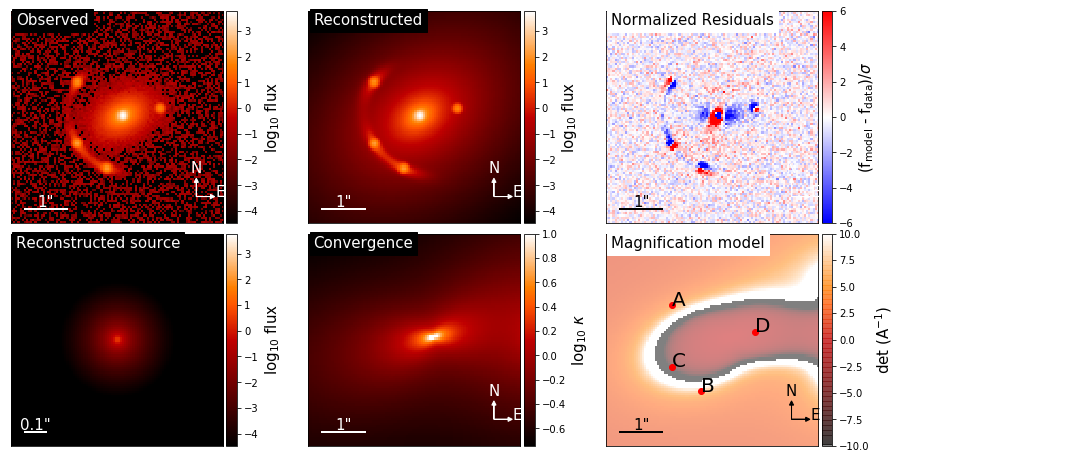

In [46]:
# we already imported ModelPlot earlier
modelPlot = ModelPlot([[kwargs_data, kwargs_psf, kwargs_numerics]],
                      kwargs_model, kwargs_result,
                      arrow_size=0.02, cmap_string="gist_heat")

f, axes = plt.subplots(2,3,figsize=(16,8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1,0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

/n/home13/atsang/.conda/envs/jup3/lib/python3.7/site-packages/lenstronomy/Plots/output_plots.py:938: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


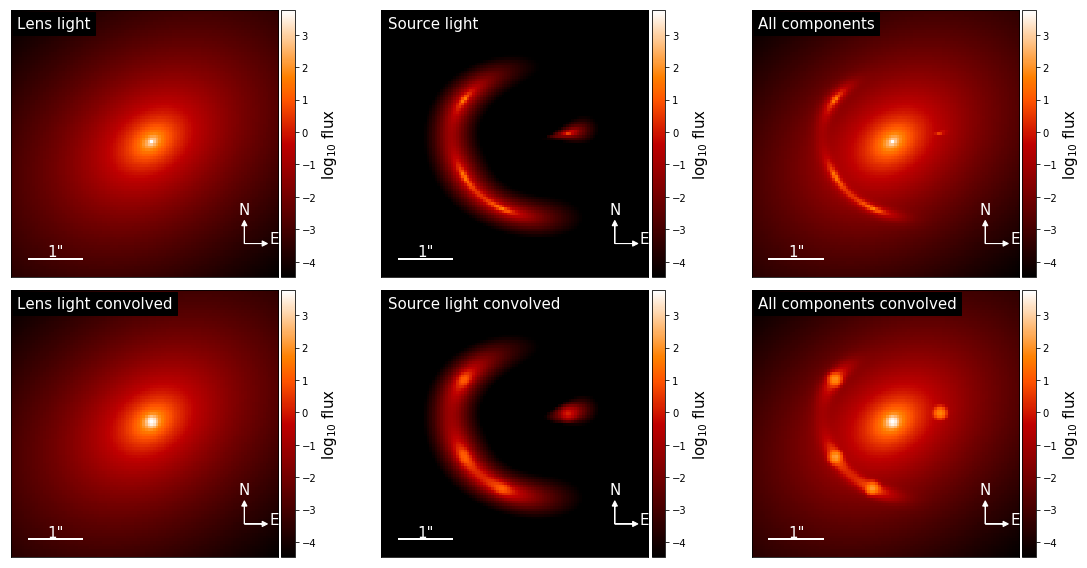

{'kwargs_lens': [{'theta_E': 1.030888480461584, 'gamma': 2.0, 'e1': 0.16983250765567925, 'e2': 0.09024690192174956, 'center_x': 0.4216546085556697, 'center_y': 0.04003233160483613}, {'gamma_ext': 0.21724497706203913, 'psi_ext': 3.216347312133437, 'ra_0': 0, 'dec_0': 0}, {'theta_E': 0.9300137593922747, 'center_x': 3.0870500643696173, 'center_y': 0.09792972637932136}], 'kwargs_source': [{'amp': 6938.52179844065, 'R_sersic': 0.017117461981105923, 'n_sersic': 2.288604591405094, 'center_x': 0.8630349443301601, 'center_y': -0.01834122054720392}], 'kwargs_lens_light': [{'amp': 281022.07020631013, 'R_sersic': 0.06550614196061198, 'n_sersic': 3.3494808826732365, 'e1': 0.06542204662525106, 'e2': 0.16131586835508924, 'center_x': 0.09655356705492767, 'center_y': -0.002474499676061137}], 'kwargs_ps': [{'ra_image': array([-0.97300936, -0.28044238, -0.96440399,  0.98506524]), 'dec_image': array([ 0.78716676, -1.24407893, -0.65878271,  0.16446209]), 'point_amp': array([447.19856616, 651.71003007, 741.

In [47]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()
print(kwargs_result)

## `FittingSequence` class

* Performs PSO or MCMC runs
* Can run sequence of fitting routines
  * (results of previous --> input of next)
* Can optionally keep one or multiple parameter classes fixed during fitting or paramter inference (what's the difference?)

User needs to specify:
* Input guess and uncertainties
* Hard bounds on parameters
* Number of particles, number of iterations for PSO/MCMC

`FittingSequence` does not rely on other lenstronomy classes, but can be constructed from keyword arguments and lists thereof.

In [48]:
lens_params = [kwargs_lens_init, kwargs_lens_sigma,
               kwargs_fixed_lens, kwargs_lower_lens, kwargs_upper_lens]
source_params = [kwargs_source_init, kwargs_source_sigma,
                 kwargs_fixed_source, kwargs_lower_source, kwargs_upper_source]
lens_light_params = [kwargs_light_lens, kwargs_lens_light_sigma,
                     kwargs_fixed_lens_light, kwargs_lower_lens_light, kwargs_upper_lens_light]
ps_params = [kwargs_ps_init, kwargs_ps_sigma,
             kwargs_fixed_ps, kwargs_lower_ps, kwargs_upper_ps]

kwargs_params = {'lens_model': lens_params,
                'source_model': source_params,
                'lens_light_model': lens_light_params,
                'point_source_model': ps_params}

band_list = [kwargs_data, kwargs_psf, kwargs_numerics]
multi_band_list = []
multi_band_list.append(band_list)



from lenstronomy.Workflow.fitting_sequence import FittingSequence
fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200, 'n_iterations': 200}],
                       ['MCMC', {'n_burn': 10, 'n_run': 10, 'walkerRatio': 10, 'sigma_scale': .1}]]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
max iteration reached! stoping
-1.011265289989165 reduced X^2 of best position
-5042.674368530971 logL
9973 effective number of data points
[{'theta_E': 1.114807856914387, 'gamma': 2.0, 'e1': 0.04852199124286792, 'e2': 0.04410530687914983, 'center_x': 0.10210235562700108, 'center_y': -0.0073725407879012776}, {'gamma_ext': 0.015949295193610737, 'psi_ext': -4.118766870902763, 'ra_0': 0, 'dec_0': 0}, {'theta_E': 0.07904745953243641, 'center_x': 0.9990362640704573, 'center_y': 0.020033901030647387}] lens result
[{'amp': 1, 'R_sersic': 0.020663412292467973, 'n_sersic': 1.2468069982286107, 'center_x': -0.04009971317883066, 'center_y': -0.05177447908843354}] source result
[{'amp': 1, 'R_sersic': 0.09498542834552953, 'n_sersic': 2.6727064920839734, 'e1': 0.09757588425198971, 'e2': 0.1495561721075562, 'center_x': 0.10013529848691738, 'center_y': -4.642326791318749e-05}] lens light result
[{'ra_image': a

In [66]:
len(chain_list)

2

In [55]:
len(chain_list[0])

3

In [56]:
chain_list[0][0]

'PSO'

In [59]:
len(chain_list[0][1])

4

In [63]:
chain_list[0][2]

['gamma_ext_lens1',
 'psi_ext_lens1',
 'theta_E_lens2',
 'center_x_lens2',
 'center_y_lens2',
 'R_sersic_source_light0',
 'n_sersic_source_light0',
 'R_sersic_lens_light0',
 'n_sersic_lens_light0',
 'e1_lens_light0',
 'e2_lens_light0',
 'center_x_lens_light0',
 'center_y_lens_light0',
 'ra_image',
 'ra_image',
 'ra_image',
 'ra_image',
 'dec_image',
 'dec_image',
 'dec_image',
 'dec_image']

In [61]:
chain_list[0][1][0]

[-32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32874.29081209655,
 -32472.133576170858,
 -32472.133576170858,
 -32472.133576170858,
 -32472.133576170858,
 -32472.133576170858,
 -32472.133576170858,
 -29110.92288682892,
 -29110.92288682892,
 -29110.92288682892,
 -29110.92288682892,
 -29110.92288682892,
 -29110.92288682892,
 -29110.92288682892,
 -28620.158715700894,
 -28620.158715700894,
 -28620.158715700894,
 -28574.052264772778,
 -28574.052264772778,
 -26399.647117442248,
 -24842.531690296724,
 -24146.98386579093,
 -21925.312519041334,
 -21925.312519041334,
 -21547.834617556095,
 -20166.230235892563,
 -20166.230235892563,
 -20166.230235892563,
 -20166.230235892563,
 -19880.44092122018,
 -19079.04384335913,
 -19079.04384335913,
 -19079.04384335913,
 -18560.962919

In [62]:
chain_list[0][1][1]

[[0.05,
  0,
  0.1,
  1.0,
  0,
  0.03,
  1.0,
  0.1,
  2.5,
  0.09534746574143645,
  0.14849487967198177,
  0.1,
  0,
  -0.9586900728075508,
  -0.2687251229895962,
  -0.9604575591020713,
  0.9894269663706103,
  0.7715205849609393,
  -1.2471618282115082,
  -0.6633518531631627,
  0.15960472625186437],
 [0.05,
  0,
  0.1,
  1.0,
  0,
  0.03,
  1.0,
  0.1,
  2.5,
  0.09534746574143645,
  0.14849487967198177,
  0.1,
  0,
  -0.9586900728075508,
  -0.2687251229895962,
  -0.9604575591020713,
  0.9894269663706103,
  0.7715205849609393,
  -1.2471618282115082,
  -0.6633518531631627,
  0.15960472625186437],
 [0.05,
  0,
  0.1,
  1.0,
  0,
  0.03,
  1.0,
  0.1,
  2.5,
  0.09534746574143645,
  0.14849487967198177,
  0.1,
  0,
  -0.9586900728075508,
  -0.2687251229895962,
  -0.9604575591020713,
  0.9894269663706103,
  0.7715205849609393,
  -1.2471618282115082,
  -0.6633518531631627,
  0.15960472625186437],
 [0.05,
  0,
  0.1,
  1.0,
  0,
  0.03,
  1.0,
  0.1,
  2.5,
  0.09534746574143645,
  0.148494

In [53]:
chain_list[1]

['EMCEE', array([[ 1.00071126e-02,  1.32061408e+00, -1.26239177e-01, ...,
         -1.26783690e+00, -6.31225048e-01,  1.15659423e-01],
        [ 3.30216992e-01,  1.56239141e+01, -8.65677969e-02, ...,
         -1.02023036e+00, -8.14687532e-01,  1.45417593e-01],
        [ 1.11868313e-01, -4.24009380e+00,  3.05311927e-02, ...,
         -1.25092598e+00, -6.29435416e-01,  2.03179282e-01],
        ...,
        [-1.20042519e+00, -2.33377093e+01,  1.64569662e+00, ...,
         -1.64678167e+00, -6.76875071e-01, -3.99932625e-01],
        [-1.39251391e-01, -1.21711350e+01,  6.79883159e-01, ...,
         -1.03145242e+00, -1.06429573e+00, -7.50235526e-01],
        [ 1.89804852e-02, -2.52023866e+00,  1.40884210e-01, ...,
         -1.23594648e+00, -6.65499483e-01,  1.61843170e-01]]), ['gamma_ext_lens1',
  'psi_ext_lens1',
  'theta_E_lens2',
  'center_x_lens2',
  'center_y_lens2',
  'R_sersic_source_light0',
  'n_sersic_source_light0',
  'R_sersic_lens_light0',
  'n_sersic_lens_light0',
  'e1_lens_lig

## Extension guide

Next step: try [this notebook](https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/EinsteinRingShear_simulations.ipynb).

In [53]:
# import of standard python libraries
import os
import time
import corner
from mpl_toolkits.axes_grid1 import make_axes_locatable